<a href="https://colab.research.google.com/github/agnesei/Diploma-SNA-DataScience/blob/main/Pandemia_in_Italia_Tra_terza_e_quarta_ondata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 in Italia

Importo le librerie che mi servono e imposto le configurazioni globali:
- [pandas](https://pandas.pydata.org/) per la manipolazione e l'analisi dei dati
- [matplotlib](https://matplotlib.org/) per la configurazione dei grafici

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50, 20]

Scarico e importo da [Github](https://github.com/pcm-dpc/COVID-19) la tabella della protezione civile con tutti i dati giornalieri.

Il [file CSV](https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv) si può anche scaricare a mano e importare in un foglio di calcolo, per esempio su [Google Sheet](https://docs.google.com/spreadsheets/d/1_FzrZZbagiQ-iRiDQeDlED1W3gvEdzGsnOAe9f3PKmk/edit).

In [ ]:
data = pd.read_csv("https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv", index_col = "data", parse_dates = True)

In [ ]:
data

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,7,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,10,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,12,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,17,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,21,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12 17:00:00,ITA,8234,513,8747,976875,985622,9143,53825,12180724,156782,...,192230588,52441042.0,NaN,40.0,NaN,NaN,8069893.0,5253235.0,86453597.0,105776991.0
2022-03-13 17:00:00,ITA,8240,516,8756,990748,999504,13882,48886,12216835,156868,...,192560616,52519706.0,NaN,41.0,NaN,NaN,8079652.0,5293555.0,86531713.0,106028903.0
2022-03-14 17:00:00,ITA,8468,518,8986,994253,1003239,3735,28900,12242669,156997,...,192765493,52568640.0,NaN,32.0,NaN,NaN,8084835.0,5318070.0,86576281.0,106189212.0


## Andamento giornaliero del numero totale di positivi

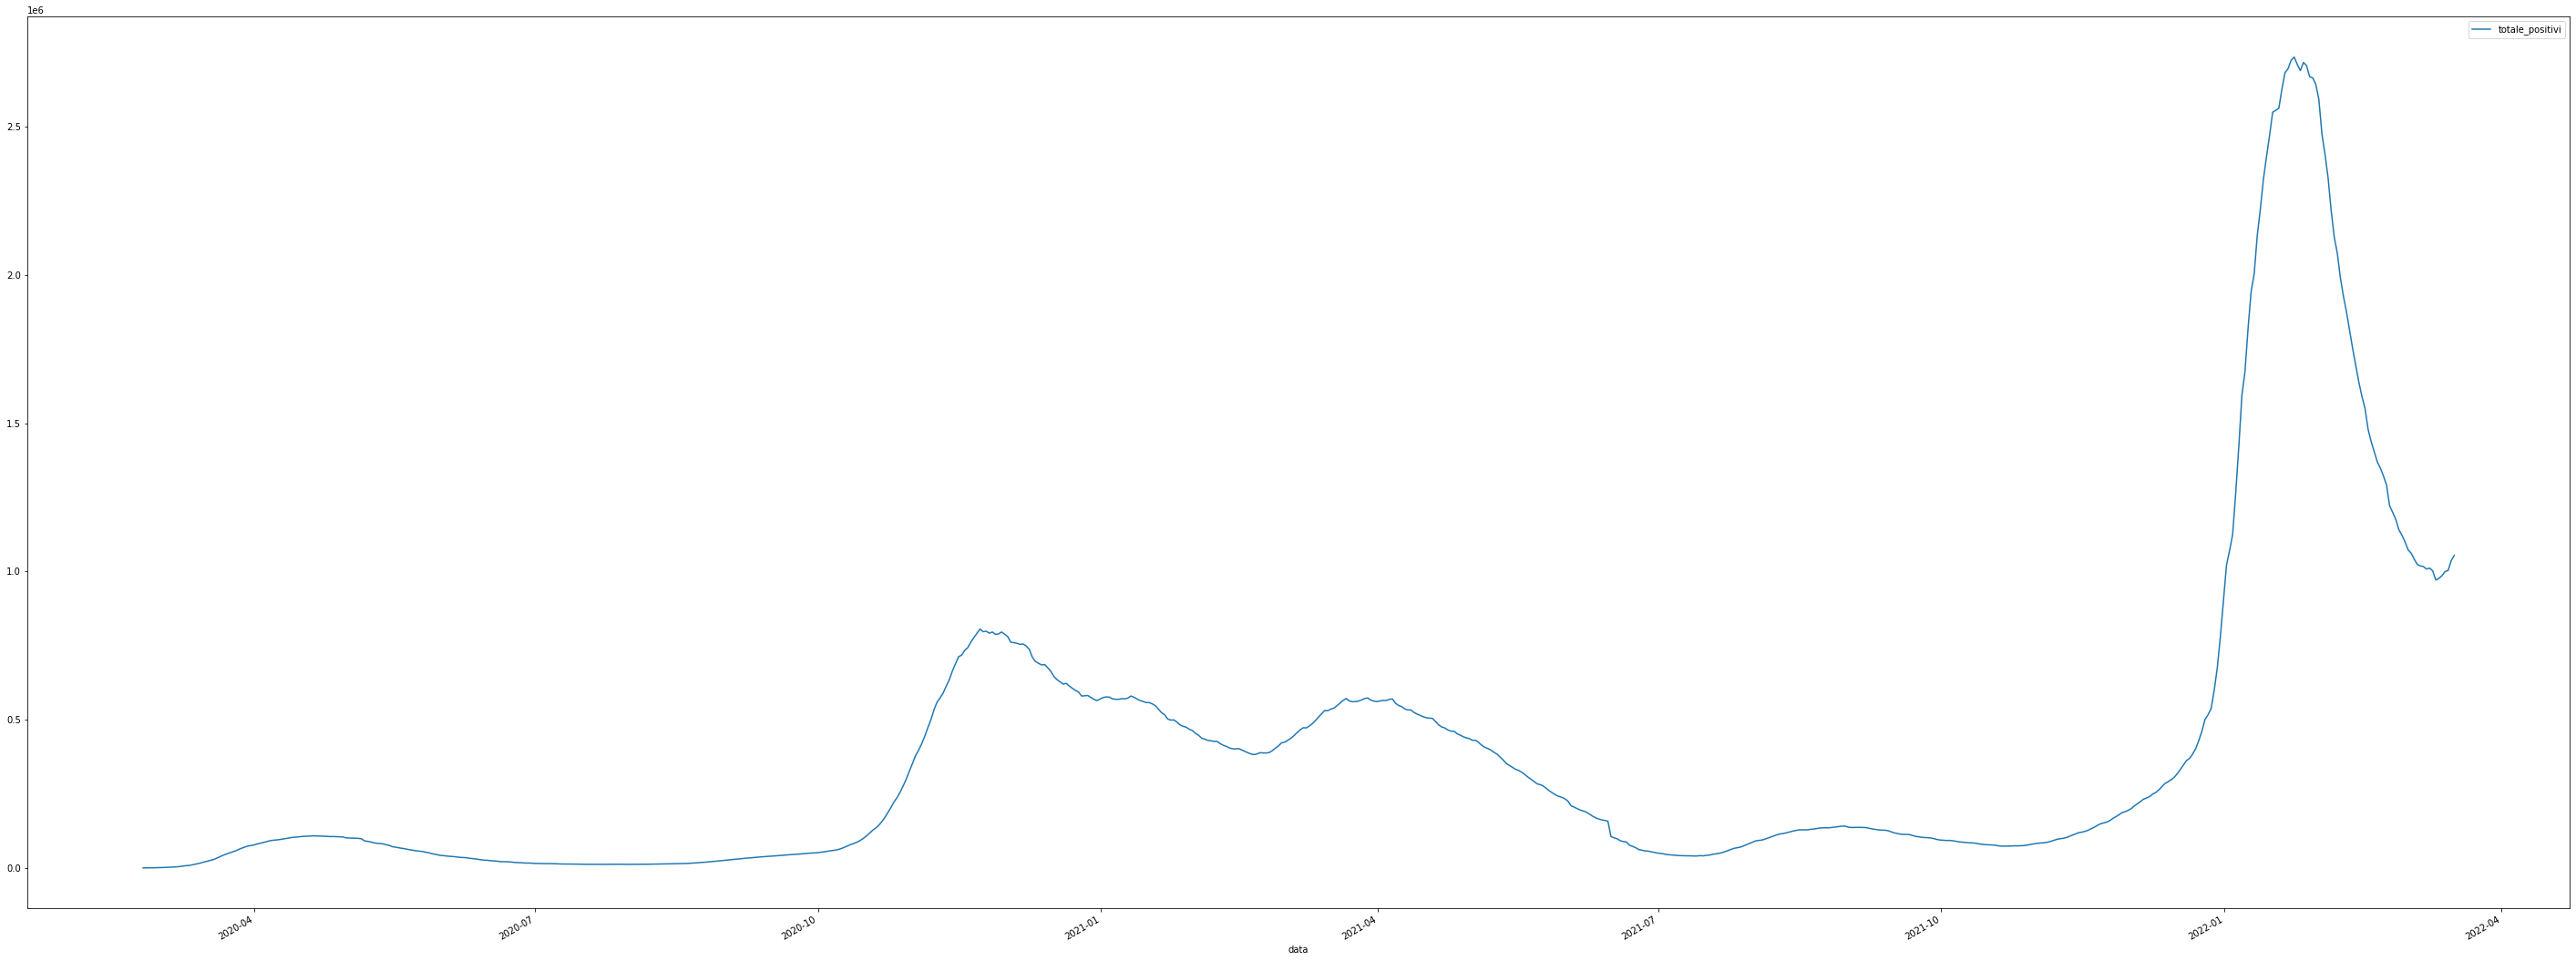

In [ ]:
data.plot.line(y = "totale_positivi")

## Andamento giornaliero dei nuovi positivi

L'andamento giornaliero dei nuovi positivi (in blu) soffre di un'oscillazione settimanale a causa del minor numero di tamponi effettuati nel weekend. Confrontiamolo con la media mobile a 7 giorni (in arancione).

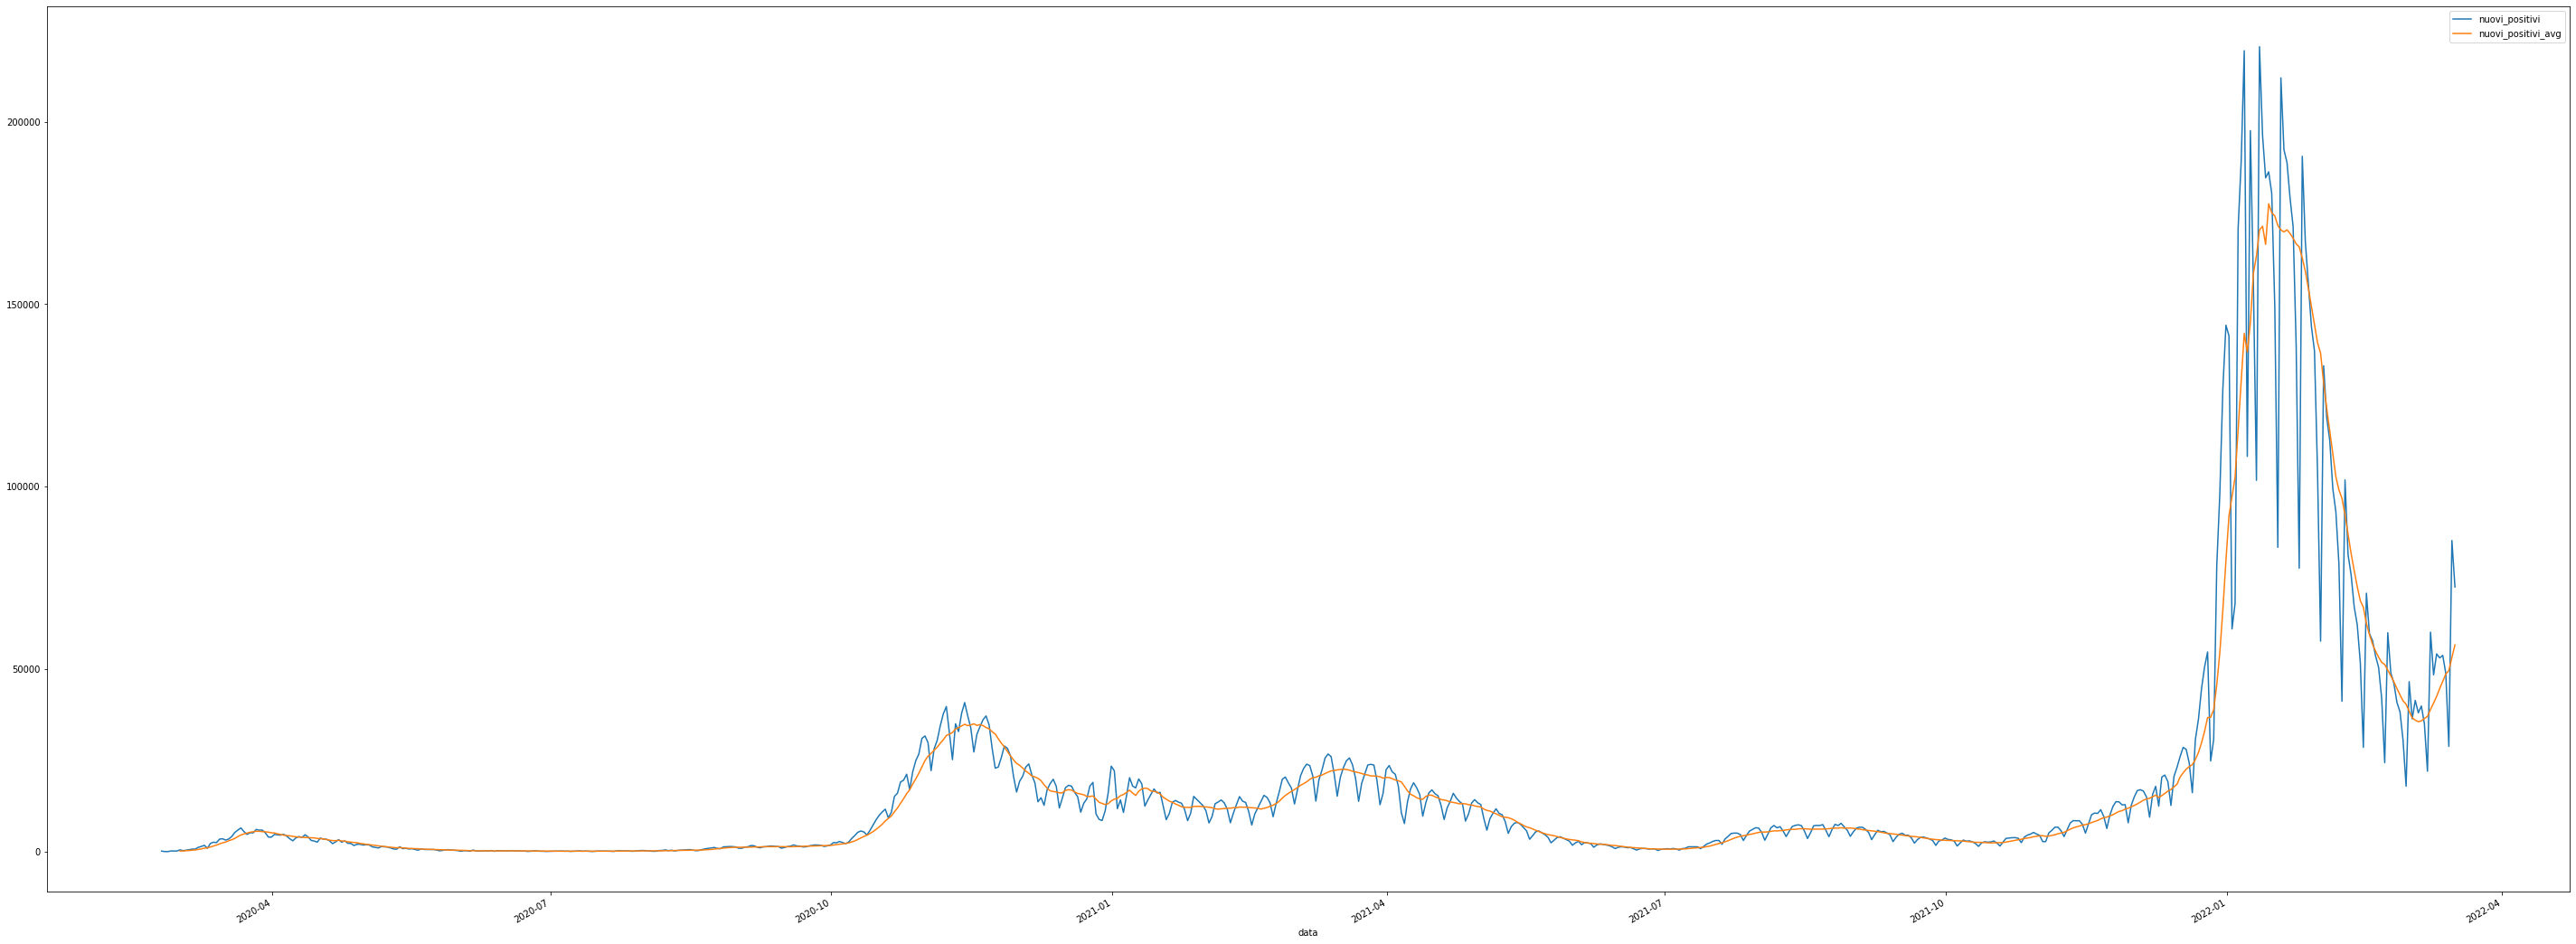

In [ ]:
data["nuovi_positivi_avg"] = data["nuovi_positivi"].rolling(7).mean()
data.plot.line(y = ["nuovi_positivi", "nuovi_positivi_avg"])

## Andamento giornaliero dei nuovi deceduti

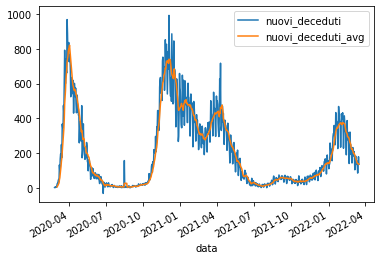

In [ ]:
data["nuovi_deceduti"] = data["deceduti"].diff()
data["nuovi_deceduti_avg"] = data["nuovi_deceduti"].rolling(7).mean()
data.plot.line(y = ["nuovi_deceduti", "nuovi_deceduti_avg"])

## Capacità di tracciamento

Un altro modo per liberarsi dall'effetto weekend e osservare la capacità di tracciamento del sistema è dare un'occhiata all'indice di positività.

Prima guardiamo al numero di tamponi e di casi testati notificati giornalmente.

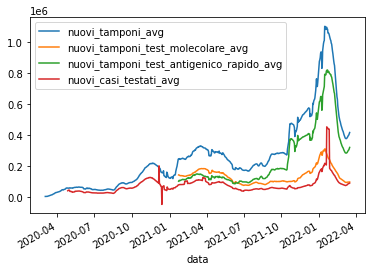

In [ ]:
data["nuovi_tamponi_avg"] = data["tamponi"].diff().rolling(7).mean()
data["nuovi_tamponi_test_molecolare_avg"] = data["tamponi_test_molecolare"].diff().rolling(7).mean()
data["nuovi_tamponi_test_antigenico_rapido_avg"] = data["tamponi_test_antigenico_rapido"].diff().rolling(7).mean()
data["nuovi_casi_testati_avg"] = data["casi_testati"].diff().rolling(7).mean()

data.plot.line(y = ["nuovi_tamponi_avg", "nuovi_tamponi_test_molecolare_avg", "nuovi_tamponi_test_antigenico_rapido_avg", "nuovi_casi_testati_avg"])

L'indice di positività si può definire in molti modi diversi:
- il rapporto tra tamponi risultati positivi e tamponi effettuati (molecolari + antigenici, in blu)
- il rapporto tra le persone risultate positive e quelle testate (tamponi molecolari + antigenici, in arancione)
- il rapporto tra tamponi molecolari risultati positivi e tamponi effettuati (solo molecolari, in verde)

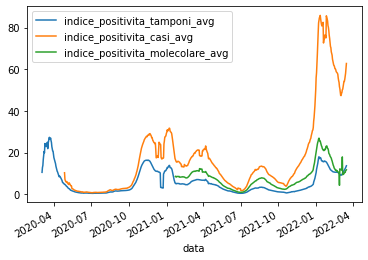

In [ ]:
data["indice_positivita_tamponi"] = data["nuovi_positivi"] / data["tamponi"].diff() * 100
data["indice_positivita_tamponi_avg"] = data["indice_positivita_tamponi"].rolling(7).mean()

data["indice_positivita_casi"] = data["nuovi_positivi"] / data["casi_testati"].diff() * 100
data["indice_positivita_casi_avg"] = data["indice_positivita_casi"].rolling(7).mean()

data["indice_positivita_molecolare"] = data["totale_positivi_test_molecolare"].diff() / data["tamponi_test_molecolare"].diff() * 100
data["indice_positivita_molecolare_avg"] = data["indice_positivita_molecolare"].rolling(7).mean()

data.plot.line(y = ["indice_positivita_tamponi_avg", "indice_positivita_casi_avg", "indice_positivita_molecolare_avg"])

## Diagrammi di fase (variazione in funzione del valore)

Numero di nuovi positivi in funzione del numero totale di casi. Si vedono bene le tre ondate e _mezzo_ che hanno caratterizzato questa pandemia.

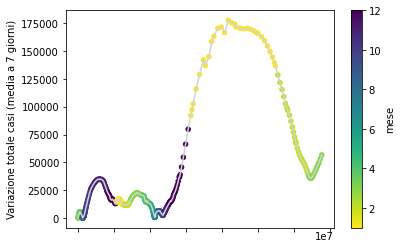

In [ ]:
months = ["Gennaio", "Febbraio", "Marzo", "Aprile", "Maggio", "Giugno", "Luglio", "Agosto", "Settembre", "Ottobre", "Novembre", "Dicembre"]
data["mese"] = data.index.month
data["anno"] = data.index.year
data["mese_anno"] = data["mese"].map(lambda d: months[d-1]) + ' ' + data["anno"].astype('string')
data["mese_nome"] = data["mese"].map(lambda d: months[d-1])
data["variazione_totale_casi"] = data["totale_casi"].diff()
data["variazione_totale_casi_avg"] = data["variazione_totale_casi"].rolling(7).mean()
#scatter = data.plot.scatter("totale_casi", "variazione_totale_casi_avg", c = "mese_id", colormap = "viridis_r", xlabel = "Totale casi", ylabel = "Variazione totale casi (media a 7 giorni)")
scatter = data.plot.scatter("totale_casi", "nuovi_positivi_avg", c = "mese", colormap = "viridis_r", xlabel = "Totale casi", ylabel = "Variazione totale casi (media a 7 giorni)")
data.plot.line("totale_casi", "nuovi_positivi_avg", ax=scatter, style='lightgrey', legend = False)

Vediamo come varia il numero di nuovi positivi (media a sette giorni) in funzione del numero totale di positivi.

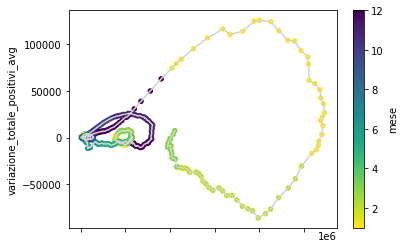

In [ ]:
data["variazione_totale_positivi_avg"] = data["variazione_totale_positivi"].rolling(7).mean()
scatter = data.plot.scatter("totale_positivi", "variazione_totale_positivi_avg", c = "mese", colormap = "viridis_r")
#scatter = data.plot.scatter("totale_positivi", "nuovi_positivi_avg", c = "mese", colormap = "viridis_r")
data.plot.line("totale_positivi", "variazione_totale_positivi_avg", ax=scatter, style='lightgrey', legend = False)

Il totale degli ospedalizzati.

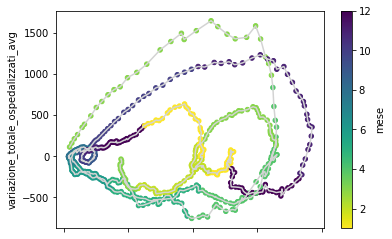

In [ ]:
data["variazione_totale_ospedalizzati"] = data["totale_ospedalizzati"].diff()
data["variazione_totale_ospedalizzati_avg"] = data["variazione_totale_ospedalizzati"].rolling(7).mean()
scatter = data.plot.scatter("totale_ospedalizzati", "variazione_totale_ospedalizzati_avg", c = "mese", colormap = "viridis_r")
data.plot.line("totale_ospedalizzati", "variazione_totale_ospedalizzati_avg", ax=scatter, style='lightgrey', legend = False)

Terapie intensive.

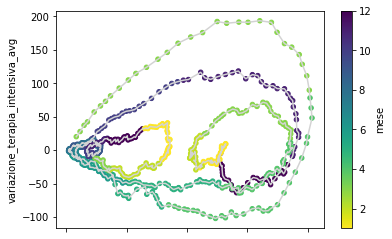

In [ ]:
data["variazione_terapia_intensiva"] = data["terapia_intensiva"].diff()
data["variazione_terapia_intensiva_avg"] = data["variazione_terapia_intensiva"].rolling(7).mean()
data["ingressi_terapia_intensiva_avg"] = data["ingressi_terapia_intensiva"].rolling(7).mean()
scatter = data.plot.scatter("terapia_intensiva", "variazione_terapia_intensiva_avg", c = "mese", colormap = "viridis_r")
#scatter = data.plot.scatter("terapia_intensiva", "ingressi_terapia_intensiva_avg", c = "mese", colormap = "viridis_r")
data.plot.line("terapia_intensiva", "variazione_terapia_intensiva_avg", ax=scatter, style='lightgrey', legend = False)

In [ ]:
from google.colab import files
data.to_csv('data.csv')
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>